On va utiliser la librairie `nltk` pour manipuler du text, en vue d'exploiter un algorithme de Machine Learning.

In [ ]:
import nltk

`nltk` est organisé en **modules**.

# Prétraitement de texte

Le prétraitement des textes est naturellement différent du prétraitement numérique classique. Cependant, il est tout aussi important. Les tâches courantes de prétraitement sont les suivantes :

* lowercase
* Traitement des chiffres et de la ponctuation
* Suppression des "Stopwords".
* Tokenisation
* Dédoublement ou lemmatisation

## LowerCase

Les algorithmes de modélisation de texte sont sensibles à la différence entre minuscule et majuscule. 

In [ ]:
text = '999 Football is my passion. I love to play with footballs!! Who else loves football?'


In [ ]:
import string

new_string=text.translate(str.maketrans("","",string.punctuation))
print(new_string)

UP TO 500 people could be dying every week due to NHS delays caused by the winter flu crisis a top doctor has warned


## Les nombres

En fonction de la tâche, il peut être nécessaire de supprimer les numéros dans le cadre du prétraitement.

In [ ]:
text =''.join(word for word in text if not word.isdigit())

text

'UP TO  people could be dying every week due to NHS delays caused by the winter flu crisis, a top doctor has warned.'

👍 Les nombres sont utiles pour l'extraction de dates

👎 Les nombres sont inutile pour la modélisation de certains sujets.

# Ponctuation

Comme les chiffres, la ponctuation peut devoir être supprimée dans le cadre du prétraitement.

In [ ]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
for punctuation in string.punctuation:
  text=text.replace(punctuation,'')
text

'UP TO  people could be dying every week due to NHS delays caused by the winter flu crisis a top doctor has warned'

⚠️ La ponctuation est rarement respectée dans les formes de texte modernes (par exemple, les médias sociaux).  
À moins que vous ne puissiez garantir une utilisation correcte de la ponctuation dans l'ensemble de l'ensemble de données, il est préférable de les supprimer.

In [ ]:
text=text.lower()
text

' football is my passion i love to play with footballs who else loves football'

## StopWords

Les "Stopwords" sont des mots si fréquemment utilisés que pour de nombreuses tâches, ils n'apportent pas beaucoup d'informations. `NLTK` dispose d'un corpus intégré de mots d'arrêt en anglais, en français, et d'autres langues, qui peuvent être utilisés.

In [ ]:
text

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
text

' football is my passion i love to play with footballs who else loves football'

## La Tokenisation

La tokénisation consiste à transformer une chaîne de caractères unique en une liste de mots, également appelés tokens de mots.

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
word_tokens = word_tokenize(text)

word_tokens
  

['football',
 'is',
 'my',
 'passion',
 'i',
 'love',
 'to',
 'play',
 'with',
 'footballs',
 'who',
 'else',
 'loves',
 'football']

In [ ]:
text = [w for w in word_tokens if not w in stop_words]

text

['football',
 'passion',
 'love',
 'play',
 'footballs',
 'else',
 'loves',
 'football']

👍 La suppression des "stopwords" est utile pour l'analyse des sentiments.

# Stemming et Lemmatizing

`Stemming`  et la `lemmatisation` sont des techniques utilisées pour trouver la racine des mots, afin de les regrouper par sens plutôt que par forme exacte.

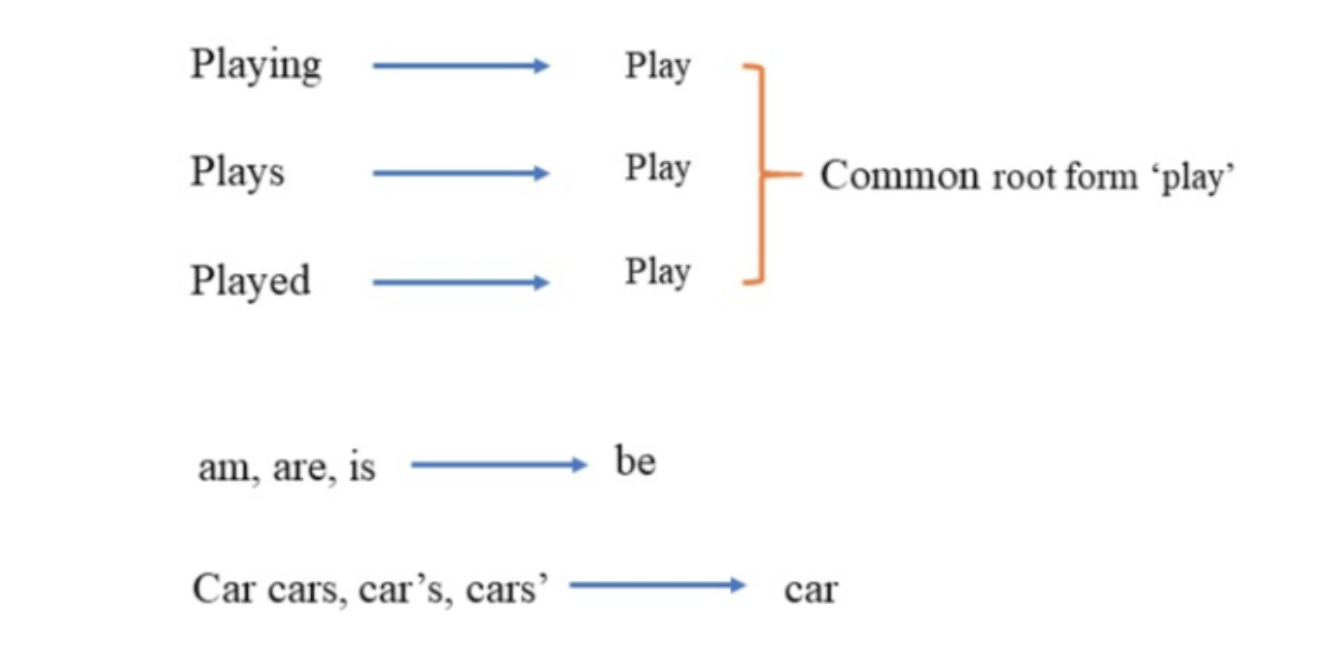

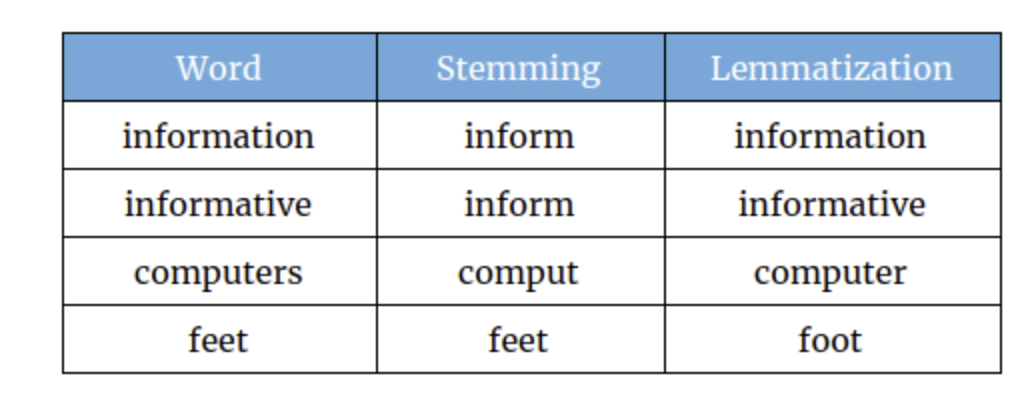

In [ ]:
text

['football',
 'passion',
 'love',
 'play',
 'footballs',
 'else',
 'loves',
 'football']

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
stemmed=[stemmer.stem(word) for word in text]

stemmed

['footbal', 'passion', 'love', 'play', 'footbal', 'els', 'love', 'footbal']

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

lemmatizer=WordNetLemmatizer()
lemmatized=[lemmatizer.lemmatize(word) for word in text]

lemmatized

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['football', 'passion', 'love', 'play', 'football', 'else', 'love', 'football']